In [67]:
import matplotlib.pyplot as plt
import time 
import random
import math
import numpy as np
import pandas as pd

In [62]:
# implementation of an undirected graph using Adjacency Matrix, with weighted or unweighted edges
# its definitely work


class Weighted_Graph:
    
    V=0
    edges = [] #its a 2d array
    
    def __init__(self,num):
        self.V=num
        self.edges=[[0 for column in range(self.V)]
                      for row in range(self.V)]
        

    def add_edge(self, u, v, weight=1):
        if u < self.V and v < self.V:
            self.edges[u][v] = weight
            self.edges[v][u] = weight
            return True
        else:
            return False

    def print_graph(self):
        for row in self.edges:
            print(row)
            
    def dijkstra(self, src):
        
        #create the 3 utility arrays used during dijkstra search
        distanceToSource=[float('inf')]*self.V #this is the shortest time we found SO FAR
        
        #parent array is actually not used at all if we are not trying to restruct shortest paths to every node
        parent=[None] * self.V
        
        visited=[False]*self.V
        
        #create priority queue empty
        #array implementation of priorityQ
        priorityArray= []
        
        #THIS IS THE ONLY 2 INIT WE NEED TO DO
        distanceToSource[src] = 0
        priorityArray.append((distanceToSource[src],src))
        priorityArray.sort(key= lambda x:x[0])        
                
                

        #priorityArray == True this statement for checking if an array is empty DOESNT WORK
        while len(priorityArray)>0: #ie not empty
            smallest_distance,node = priorityArray.pop(0)
            
            if visited[node] == True:
                continue
            else:
                visited[node] = True
                
                for i in range(self.V):
                    
                    if self.edges[node][i] == 0: #means theres no edge
                        continue 

                    newcost = distanceToSource[node] + self.edges[node][i]
                    if visited[i] == False and newcost < distanceToSource[i]:
                        distanceToSource[i] = newcost
                        parent[i]= node
                        priorityArray.append((distanceToSource[i],i))
                        priorityArray.sort(key= lambda x:x[0])
                    
        return distanceToSource
            
            
                
            
        
        
        
def weight_random(largest):
#weight 0 to 10
#weight 0 is no connection
    return random.randint(0,largest)
        




2 ways of writing dijkstra

1. create empty priority queue like we did here, only add nodes to priority queue, ie let nodes be the frontier if they are not visited AND the newcost which is currentCost to get to node + weight is LESSER than the existing cost. 
    - Downside is we need to create an additional distance array and init to inifity at the start, to store all our current best estimates to get to
    
2. create a priority and IMMEDIATELY add all nodes to the queue, before starting the search, this way all the nodes are automatically in frontier, and are always sorted by their distance. This way we DONT need an additional distance array.

In [63]:
g = Weighted_Graph(5)
g.add_edge(0,1,4)
g.add_edge(0,2,2)
g.add_edge(1,2,1)
g.add_edge(1,3,3)
g.add_edge(1,4,2)
g.add_edge(3,4,5)

g.print_graph()
results=g.dijkstra(0)
print(results)


[0, 4, 2, 0, 0]
[4, 0, 1, 3, 2]
[2, 1, 0, 0, 0]
[0, 3, 0, 0, 5]
[0, 2, 0, 5, 0]
[0, 3, 2, 6, 5]


### Plotting theoretical time complexity of Dijkstra on Adjacency Matrix

In [82]:
largest=100
timearray=[]
vertexarray=[]
theoretical_complexity_matrix=[]
theoretical_complexity_list=[]
verarray=[]
start=6
end=152

#generating graphs of different sizes
for V in range(start,end,5):
    edges=0
    weighted_graph = Weighted_Graph(V)
    for i in range(V):
        for y in range (V):
            weight_random_gen=weight_random(largest)
            if (weight_random_gen>0 and i!=y):
                weighted_graph.add_edge(i, y, weight_random_gen)
                edges=edges+1
    #weighted_graph.print_graph()
                
    start=time.time()
    for i in range(V):
        weighted_graph.dijkstra(i)
    end=time.time()
    timetaken=(end-start)/V
    timearray.append(timetaken)
    vertexarray.append(V)
    theoretical_complexity_matrix.append(V**2)
    theoretical_complexity_list.append((V + edges) * math.log(V))
    


In [83]:
df=pd.read_excel("AdjListResults.xlsx")
AdjListVertex=np.array(df.iloc[0])
AdjListTime=np.array(df.iloc[1])

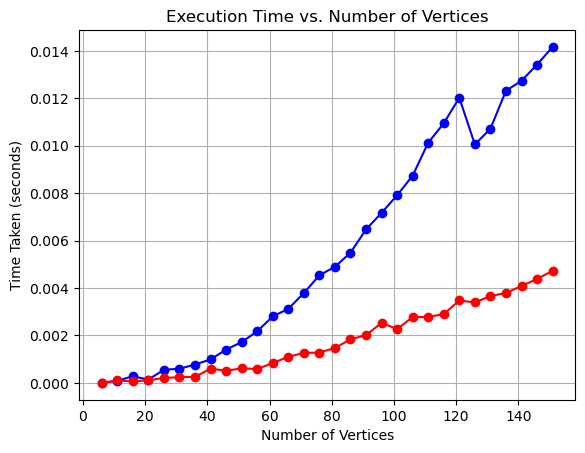

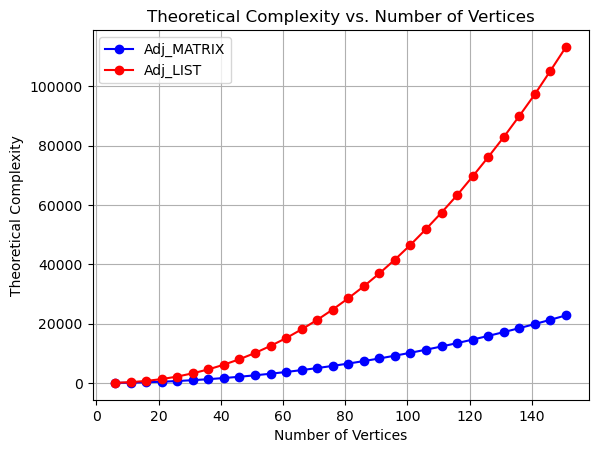

In [84]:
# # Plotting the data
plt.plot(vertexarray, timearray, marker='o', linestyle='-',color='b',label='Adj_MATRIX')
plt.plot(AdjListVertex, AdjListTime, marker='o', linestyle='-',color='r',label='Adj_LIST')
plt.xlabel('Number of Vertices')
plt.ylabel('Time Taken (seconds)')
plt.title('Execution Time vs. Number of Vertices')
plt.grid(True)
plt.show()


plt.plot(vertexarray, theoretical_complexity_matrix, marker='o', linestyle='-',color='b', label='Adj_MATRIX')
plt.plot(AdjListVertex, theoretical_complexity_list, marker='o', linestyle='-',color='r', label='Adj_LIST')
plt.xlabel('Number of Vertices')
plt.ylabel('Theoretical Complexity')
plt.title('Theoretical Complexity vs. Number of Vertices')
plt.grid(True)
plt.legend()
plt.show()